# Wine Quality Regression

In [1]:
#Disable sklearn warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Load Data

In [2]:
import pandas as pd
import numpy as np

red_wine = pd.read_csv('C:/Users/terry/Documents/ML Book/datasets/winequality-red.csv')
white_wine = pd.read_csv('C:/Users/terry/Documents/ML Book/datasets/winequality-white.csv')

In [3]:
display(red_wine.head())
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#Merge white and red wine datasets
red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Data Exploration

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [6]:
#Categorical feature analysis
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [7]:
#Numeric feature analysis
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


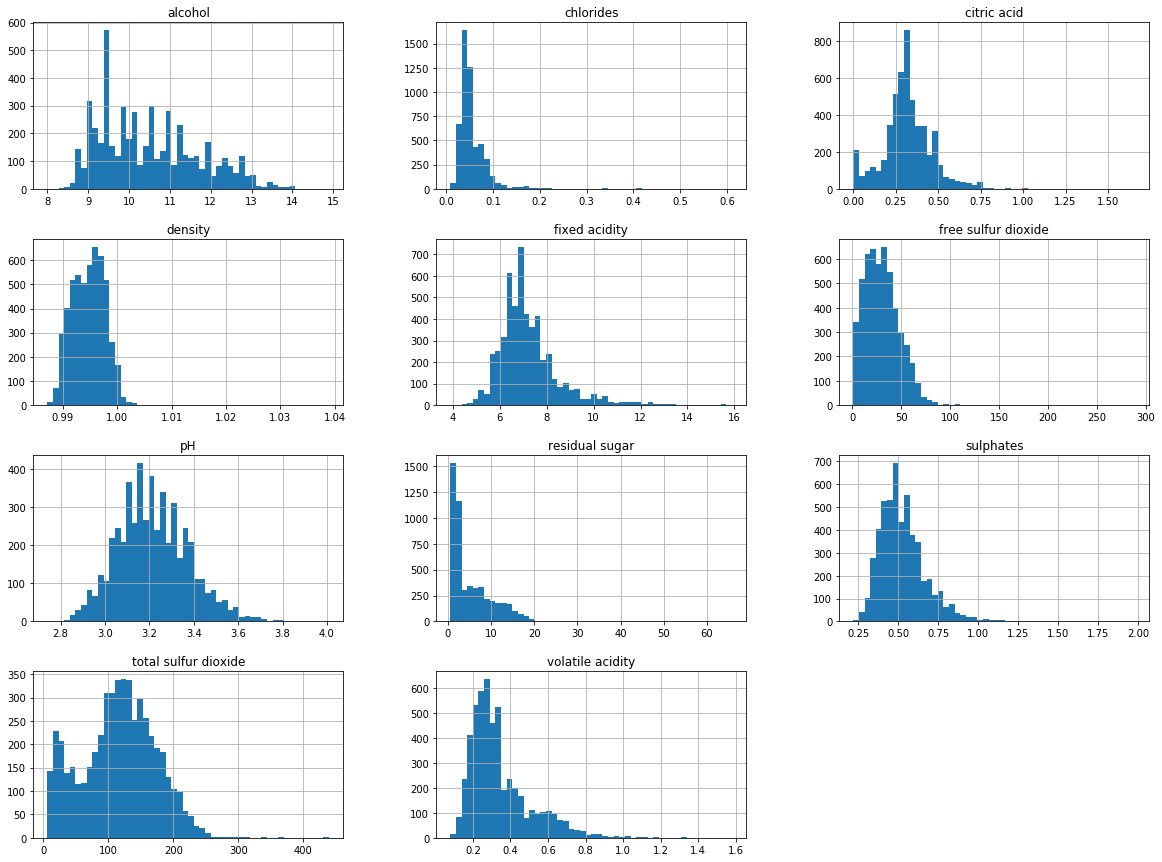

In [34]:
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(20,15))
plt.show()

# Generate Train/Test Set

In [9]:
#Stratify on wine type to ensure the distribution is preserved in the train/test set
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine, wine['type']):
    strat_train_set = wine.loc[train_index]
    strat_test_set = wine.loc[test_index]
    
display(wine['type'].value_counts() / len(wine))
display(strat_test_set['type'].value_counts() / len(strat_test_set))

white    0.753886
red      0.246114
Name: type, dtype: float64

white    0.753846
red      0.246154
Name: type, dtype: float64

In [10]:
#Set aside the test set and work with the training set
wine = strat_train_set.copy()

# Feature Correlation

In [11]:
#Correlation Matrix
corr_matrix = wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.439721
citric acid             0.094858
free sulfur dioxide     0.058149
sulphates               0.042451
pH                      0.010482
residual sugar         -0.034396
total sulfur dioxide   -0.038126
fixed acidity          -0.079541
chlorides              -0.199640
volatile acidity       -0.264985
density                -0.305457
Name: quality, dtype: float64

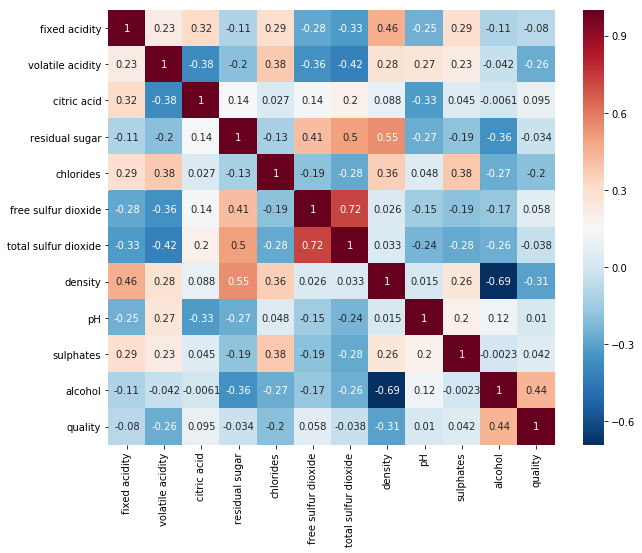

In [12]:
#Correlation Heat Map
import seaborn as sns
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')

# Data Pre-processing Pipeline

In [13]:
#create clean dataset
wine = strat_train_set.drop('quality', axis=1)
wine_labels = strat_train_set['quality'].copy()

In [14]:
#Process the data with a numerical and categorical pipeline
#The numerical pipeline fills missing values and scales the features
#The categorical pipeline encodes categorical features and does feature engineering

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_attribs = list(wine)
num_attribs.remove('type')
cat_attribs = ['type']

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

wine_prepared = full_pipeline.fit_transform(wine)
pd.DataFrame(wine_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.780839,-0.235499,1.194170,1.229111,0.054220,2.108751,1.749101,0.623768,-0.174702,0.465371,-0.912111,0.0,1.0
1,0.833361,-0.903661,1.194170,-0.887164,-0.142398,-1.098649,0.374488,-0.953600,-0.986520,-0.480979,0.427280,0.0,1.0
2,1.140827,-0.235499,0.150449,-0.125305,-1.069314,-0.423407,0.198256,0.020657,-0.611835,-0.278190,0.594703,0.0,1.0
3,-0.012173,0.007469,0.011287,-0.612048,0.953048,0.701997,-0.048470,0.637023,0.637117,1.749702,0.510992,1.0,0.0
4,0.218427,-0.417725,0.150449,-0.654374,-0.170487,-1.492540,-1.898910,0.139954,1.136697,0.735756,0.427280,1.0,0.0


# Linear Regression

In [15]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

#display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.70788141 0.7665358  0.71151298 0.74536334 0.77193421 0.79595086
 0.68797224 0.73543734 0.72123207 0.75209926]
Mean: 0.7395919512167779
Standard deviation: 0.031545186212599316


# Linear Regression With Stochastic Gradient Descent

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=0.19, penalty=None, eta0=0.1)
sgd_reg_scores = cross_val_score(sgd_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_reg_scores)
display_scores(sgd_rmse_scores)

Scores: [0.74231074 0.77816363 0.73382449 0.76691886 0.82617915 0.80246132
 0.71228027 0.76119037 0.74364511 0.77001504]
Mean: 0.7636988981763834
Standard deviation: 0.03173019742383446


In [17]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter': [5,10,50], 'eta0': [0.1, 0.05, 0.01]},
]

grid_search = GridSearchCV(sgd_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(wine_prepared, wine_labels)
display(grid_search.best_params_)
display(np.sqrt(-grid_search.best_score_))

{'eta0': 0.01, 'max_iter': 10}

0.7460335313759336

# Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(wine_prepared)

lin_reg = LinearRegression()
lin_scores = cross_val_score(lin_reg, X_poly, wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.67464585 0.75644939 0.68550983 0.72428241 0.84427441 0.76814723
 0.66219975 0.80694288 0.70916128 0.72605407]
Mean: 0.7357667120893542
Standard deviation: 0.055609284398351895


# Ridge Regression

In [19]:
#Ridge Linear Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_scores = cross_val_score(ridge_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [0.70791505 0.76653142 0.71146423 0.74534652 0.77194056 0.79593535
 0.68799661 0.73535865 0.72122384 0.75213007]
Mean: 0.7395842304540149
Standard deviation: 0.031542109410639126


In [20]:
#Ridge Linear Regression with Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2", max_iter=10, tol=0.19)
sgd_scores = cross_val_score(sgd_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

Scores: [0.71508998 0.77954808 0.71534197 0.74938574 0.78575858 0.79789195
 0.69959619 0.74258267 0.72150851 0.76245017]
Mean: 0.7469153831681229
Standard deviation: 0.032144756872428105


# Lasso Regression

In [21]:
#Lasso Linear Regression
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_scores = cross_val_score(lasso_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [0.75209945 0.80064799 0.72201933 0.77289391 0.77875942 0.83810976
 0.72450517 0.77400266 0.75502479 0.77670572]
Mean: 0.7694768205048668
Standard deviation: 0.03261625649309056


In [22]:
#Lasso Linear Regression with Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l1", max_iter=10, tol=0.19)
sgd_scores = cross_val_score(sgd_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

Scores: [0.71756132 0.78015979 0.71164277 0.75373976 0.778725   0.80095772
 0.69658076 0.74219001 0.72192442 0.76870397]
Mean: 0.7472185527186038
Standard deviation: 0.0329306574601114


# Elastic Net Regression

In [23]:
#Elastic Net Linear Regression
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
en_scores = cross_val_score(en_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
en_rmse_scores = np.sqrt(-en_scores)
display_scores(en_rmse_scores)

Scores: [0.73845586 0.78987873 0.71480969 0.761073   0.77343287 0.82423323
 0.71538803 0.76488211 0.74443428 0.76731254]
Mean: 0.7593900334100327
Standard deviation: 0.03164278893152663


In [24]:
#Elastic Net Linear Regression with Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="elasticnet", l1_ratio=0.5, max_iter=10, tol=0.19)
sgd_scores = cross_val_score(sgd_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
display_scores(sgd_rmse_scores)

Scores: [0.71619469 0.77745531 0.71442931 0.7477176  0.77918504 0.79724096
 0.69415596 0.74095228 0.72208405 0.7650426 ]
Mean: 0.7454457791272128
Standard deviation: 0.032014279528088274


# Support Vector Machine

In [25]:
#Linear SVM
from sklearn.svm import LinearSVR

svm_reg= LinearSVR(epsilon=1.5)
svm_scores = cross_val_score(svm_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [0.71793381 0.77937728 0.71993497 0.74725851 0.7866432  0.8015305
 0.70039402 0.73839111 0.73886658 0.75997952]
Mean: 0.7490309514302236
Standard deviation: 0.031000767437667


In [26]:
#Kernelized SVM
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=0.1, epsilon=0.1)
svm_scores = cross_val_score(svm_poly_reg, wine_prepared, wine_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [0.7162323  0.77557818 0.68307594 0.72582892 0.74494759 0.78938222
 0.69272909 0.75154019 0.72042826 0.75071331]
Mean: 0.7350456001983187
Standard deviation: 0.032179253111105706


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg_scores = cross_val_score(tree_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_reg_scores)
display_scores(tree_rmse_scores)

Scores: [0.89657468 0.8660254  0.80741754 0.8615728  0.97665048 0.88687004
 0.83205029 0.84775574 0.87129342 0.8235456 ]
Mean: 0.866975598148459
Standard deviation: 0.04513503858677847


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg_scores = cross_val_score(forest_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_rmse_scores)

Scores: [0.63167969 0.71074176 0.60701033 0.66219333 0.66458489 0.69880392
 0.63960625 0.64664541 0.64343431 0.66082217]
Mean: 0.6565522048493873
Standard deviation: 0.029097633822509846


In [29]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(wine_prepared, wine_labels)
display(grid_search.best_params_)
display(np.sqrt(-grid_search.best_score_))

{'max_features': 4, 'n_estimators': 30}

0.6194511016451922

In [30]:
#Feature importance
feature_importance = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
col_names = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, col_names), reverse=True)

[(0.1719421798841712, 'alcohol'),
 (0.12169884048676101, 'density'),
 (0.10936518089023874, 'volatile acidity'),
 (0.08809936744325396, 'free sulfur dioxide'),
 (0.07639614495215415, 'total sulfur dioxide'),
 (0.07631907754324466, 'chlorides'),
 (0.07556715808945234, 'sulphates'),
 (0.07281513436049598, 'citric acid'),
 (0.07260316383771201, 'residual sugar'),
 (0.06762844174606313, 'pH'),
 (0.06228862906283852, 'fixed acidity'),
 (0.0032008902558781967, 'red'),
 (0.0020757914477360063, 'white')]

# AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=1), n_estimators=100, learning_rate=0.1)
ada_reg_scores = cross_val_score(ada_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
ada_rmse_scores = np.sqrt(-ada_reg_scores)
display_scores(ada_rmse_scores)

Scores: [0.79893365 0.83179397 0.7429428  0.80743426 0.79059249 0.85861821
 0.75658844 0.80087797 0.77837463 0.79384759]
Mean: 0.7960003996345444
Standard deviation: 0.031746268973124714


# Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gbc_reg = GradientBoostingRegressor(max_depth=1, n_estimators=100, learning_rate=1.0)
gbc_reg_scores = cross_val_score(gbc_reg, wine_prepared, wine_labels, scoring='neg_mean_squared_error', cv=10)
gbc_rmse_scores = np.sqrt(-gbc_reg_scores)
display_scores(gbc_rmse_scores)

Scores: [0.69722708 0.75043752 0.68784761 0.72345252 0.7506935  0.76360743
 0.68592938 0.71035665 0.70856101 0.75694989]
Mean: 0.7235062579500001
Standard deviation: 0.028216042742645407


# Final Model On Test Set

In [33]:
#Selected model: Random Forest with tuned hyperparameters
from sklearn.metrics import mean_squared_error

grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(wine_prepared, wine_labels)
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('quality', axis=1)
y_test = strat_test_set['quality'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

display(final_model)
display(final_rmse)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

0.5717935494982986